In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# CZB Kidney analysis

In [13]:
#Read in both datasets
spatial_df = pd.read_csv('../outputs/gene_ontology/CZB_kidney_periph.csv')
display(spatial_df.head())

readzs_df = pd.read_csv('../outputs/readzs/UTR_level/Liver_kidney_10Xv3_no_unann_filt.csv')
display(readzs_df.head())

,sample_id,gene,ontology,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
0,kidney,1700011h14rik,unannotated,22,5.0,402.5,-0.237100,-4.041263,2.907786,-2.369932,0.017791,0.027893
1,kidney,Ackr1,epithelial cell of proximal tubule,33,5.0,251.0,0.131687,4.285115,3.917422,2.165022,0.030386,0.045009
2,kidney,Ackr1,unannotated,126,5.0,464.5,0.047873,3.554567,15.077100,0.915436,0.359963,0.417881
3,kidney,Acta2,glomerular capillary endothelial cell,29,5.0,230.0,0.258824,4.556251,3.626218,2.392658,0.016727,0.026534
4,kidney,Acta2,macrophage,58,6.0,203.0,0.132695,6.836597,6.306195,2.722427,0.006480,0.010953


,window,ontology,sum_counts_per_window_per_ont,med_counts_per_window_per_ont,median_z_scaled,perm_p_val,significant,medians_range,chr,gene,strand,rz_bh_corrected
0,chr4_Errfi1_plus,Hepatocyte (Pericentral and Periportal),12,1.0,-0.684515,0.0,True,1.793408,chr4,Errfi1,+,0.0
1,chr4_Errfi1_plus,Hepatocyte (Midlobular),9,1.0,-0.662191,0.0,True,1.793408,chr4,Errfi1,+,0.0
2,chr4_Errfi1_plus,Epcam kidney collecting duct principal cell,38,1.0,-0.558010,0.0,True,1.793408,chr4,Errfi1,+,0.0
3,chr4_Errfi1_plus,Epcam thick ascending tube S epithelial cell,8,1.0,-0.535685,0.0,True,1.793408,chr4,Errfi1,+,0.0
4,chr4_Errfi1_plus,Kupffer cell,33,1.0,-0.498477,0.0,True,1.793408,chr4,Errfi1,+,0.0


In [14]:
#creating mapping from spatial to readzs cell types
spatial_to_readzs_ann = {
    'epithelial cell of proximal tubule':'Epcam    kidney proximal convoluted tubule epithelial cell',
    'glomerular capillary endothelial cell':'Pecam    kidney capillary endothelial cell',
    'kidney blood vessel cell':'CD45    plasma cell',
    'kidney collecting duct epithelial cell':'Epcam    kidney collecting duct principal cell',
    'kidney distal convoluted tubule epithelial cell':'Epcam     kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle epithelial cell':'Epcam    thick ascending tube S epithelial cell',
    'lymphocyte':'B cell',
    'macrophage':'CD45    macrophage',
    #'pericyte',
    'podocyte':'Epcam    podocyte',
}

spatial_df['ontology'] = spatial_df['ontology'].map(spatial_to_readzs_ann)
spatial_df = spatial_df.dropna()
spatial_df.head()

,sample_id,gene,ontology,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
1,kidney,Ackr1,Epcam kidney proximal convoluted tubule epi...,33,5.0,251.0,0.131687,4.285115,3.917422,2.165022,0.030386,0.045009
3,kidney,Acta2,Pecam kidney capillary endothelial cell,29,5.0,230.0,0.258824,4.556251,3.626218,2.392658,0.016727,0.026534
4,kidney,Acta2,CD45 macrophage,58,6.0,203.0,0.132695,6.836597,6.306195,2.722427,0.006480,0.010953
6,kidney,Acta2,Epcam podocyte,64,6.5,210.5,0.000000,1.985608,6.728628,0.765474,0.443990,0.497357
8,kidney,Actn4,Epcam kidney proximal convoluted tubule epi...,962,6.0,282.0,0.033276,33.079676,116.628698,3.063081,0.002191,0.003889


In [26]:
#merge the spatial and readzs tables
m = spatial_df.merge(readzs_df, on=['gene','ontology'])

#only keep genes present in at least 3 ontologies
m = m.groupby('gene').filter(lambda g: g['ontology'].nunique() >= 3)

m.head()

,sample_id,gene,ontology,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,...,window,sum_counts_per_window_per_ont,med_counts_per_window_per_ont,median_z_scaled,perm_p_val,significant,medians_range,chr,strand,rz_bh_corrected
1,kidney,Csf1r,Pecam kidney capillary endothelial cell,68,6.0,315.0,-0.429577,-24.354871,8.013439,-8.603524,...,chr18_Csf1r_minus,10,1.0,0.731739,0.00,True,2.328987,chr18,-,0.00
2,kidney,Csf1r,Epcam kidney collecting duct principal cell,22,6.0,318.5,-0.712482,-14.230789,2.461435,-9.070575,...,chr18_Csf1r_minus,79,1.0,0.702814,0.00,True,2.328987,chr18,-,0.00
3,kidney,Csf1r,CD45 macrophage,132,6.0,214.0,-0.237900,-32.287407,15.144544,-8.296694,...,chr18_Csf1r_minus,83,1.0,-1.530420,0.00,True,2.328987,chr18,-,0.00
4,kidney,Csf1r,Epcam podocyte,1238,6.0,286.0,-0.547106,-565.360072,141.778931,-47.480937,...,chr18_Csf1r_minus,66,1.0,0.731739,0.00,True,2.328987,chr18,-,0.00
14,kidney,Hnf1b,Epcam kidney proximal convoluted tubule epi...,1227,6.0,258.0,-0.562044,-568.494701,141.262634,-47.831365,...,chr11_Hnf1b_minus,184,1.0,-0.767347,0.46,False,2.126854,chr11,-,0.46


In [27]:
m.columns

Index(['sample_id', 'gene', 'ontology', 'num_cells', 'med_gene_spots',
       'med_spots', 'med_score', 'score_sum', 'var_sum', 'z', 'p', 'bh_p',
       'window', 'sum_counts_per_window_per_ont',
       'med_counts_per_window_per_ont', 'median_z_scaled', 'perm_p_val',
       'significant', 'medians_range', 'chr', 'strand', 'rz_bh_corrected'],
      dtype='object')

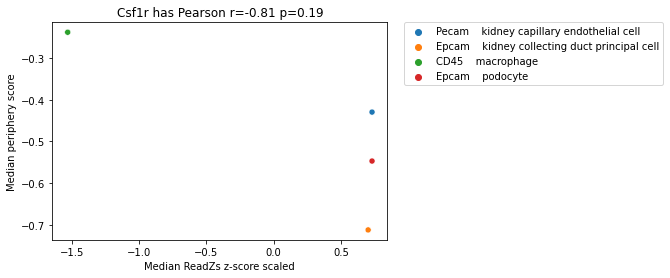

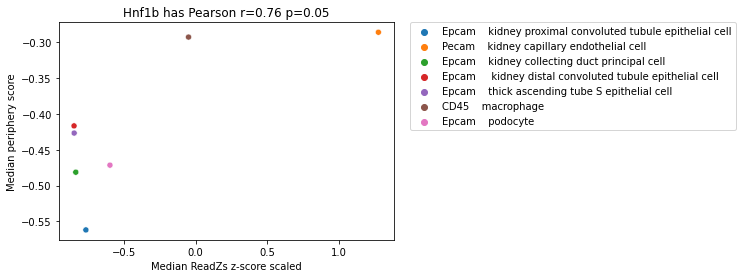

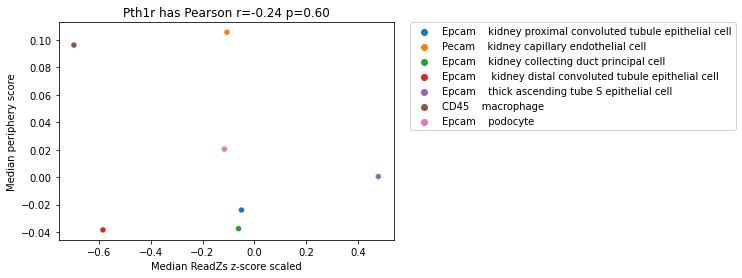

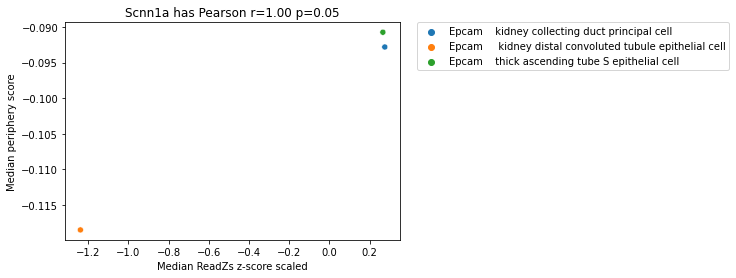

In [35]:
for gene,plot_g in m.groupby('gene'):
    
    r,p = stats.pearsonr(plot_g['median_z_scaled'], plot_g['med_score'])
    
    sns.scatterplot(
        x = 'median_z_scaled',
        y = 'med_score',
        hue = 'ontology',
        data = plot_g,
    )
    plt.title('{} has Pearson r={:.2f} p={:.2f}'.format(gene,r,p))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Median ReadZs z-score scaled')
    plt.ylabel('Median periphery score')
    plt.show()
    plt.close()

# CZB Liver analysis

In [36]:
#Read in both datasets
spatial_df = pd.read_csv('../outputs/gene_ontology/CZB_liver_periph.csv')
display(spatial_df.head())

readzs_df = pd.read_csv('../outputs/readzs/UTR_level/Liver_kidney_10Xv3_no_unann_filt.csv')
display(readzs_df.head())

,sample_id,gene,ontology,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
0,liver,Actn4,hepatic stellate cell,101,6.0,200.0,-0.266055,-26.622938,11.733536,-7.772156,7.716122e-15,1.543224e-14
1,liver,Actn4,pericentral hepatocyte,75,5.0,406.0,-0.027569,-1.603988,9.550572,-0.519023,6.037449e-01,6.221415e-01
2,liver,Actn4,periportal hepatocyte,65,5.0,402.0,-0.051095,-2.841369,8.641311,-0.966580,3.337540e-01,3.557493e-01
3,liver,Actn4,unannotated,88,5.0,506.5,0.012171,-5.199931,11.239460,-1.551047,1.208905e-01,1.354556e-01
4,liver,Alox5ap,other hepatocyte,29,5.0,402.0,-0.569149,-14.915311,3.794503,-7.656933,1.904262e-14,3.748072e-14


,window,ontology,sum_counts_per_window_per_ont,med_counts_per_window_per_ont,median_z_scaled,perm_p_val,significant,medians_range,chr,gene,strand,rz_bh_corrected
0,chr4_Errfi1_plus,Hepatocyte (Pericentral and Periportal),12,1.0,-0.684515,0.0,True,1.793408,chr4,Errfi1,+,0.0
1,chr4_Errfi1_plus,Hepatocyte (Midlobular),9,1.0,-0.662191,0.0,True,1.793408,chr4,Errfi1,+,0.0
2,chr4_Errfi1_plus,Epcam kidney collecting duct principal cell,38,1.0,-0.558010,0.0,True,1.793408,chr4,Errfi1,+,0.0
3,chr4_Errfi1_plus,Epcam thick ascending tube S epithelial cell,8,1.0,-0.535685,0.0,True,1.793408,chr4,Errfi1,+,0.0
4,chr4_Errfi1_plus,Kupffer cell,33,1.0,-0.498477,0.0,True,1.793408,chr4,Errfi1,+,0.0


In [37]:
sorted(spatial_df['ontology'].unique())

['Kupffer cell',
 'NK cell',
 'hepatic stellate cell',
 'other endothelial cell',
 'other hepatocyte',
 'pericentral endothelial cell',
 'pericentral hepatocyte',
 'periportal endothelial cell',
 'periportal hepatocyte',
 'unannotated']

In [40]:
spatial_to_readzs_ann = {
    'Kupffer cell':'Kupffer cell',
    'NK cell':'NK/T',
    'hepatic stellate cell':'hepatic stellate cell',
    'other endothelial cell':'endothelial cell of hepatic sinusoid',
    'other hepatocyte':'Hepatocyte (Midlobular)',
    #'pericentral endothelial cell',
    'pericentral hepatocyte':'Hepatocyte (Pericentral)',
    #'periportal endothelial cell',
    'periportal hepatocyte':'Hepatocyte (Periportal)',
}

spatial_df['ontology'] = spatial_df['ontology'].map(spatial_to_readzs_ann)
spatial_df = spatial_df.dropna()
spatial_df.head()

,sample_id,gene,ontology,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,p,bh_p
0,liver,Actn4,hepatic stellate cell,101,6.0,200.0,-0.266055,-26.622938,11.733536,-7.772156,7.716122e-15,1.543224e-14
1,liver,Actn4,Hepatocyte (Pericentral),75,5.0,406.0,-0.027569,-1.603988,9.550572,-0.519023,6.037449e-01,6.221415e-01
2,liver,Actn4,Hepatocyte (Periportal),65,5.0,402.0,-0.051095,-2.841369,8.641311,-0.966580,3.337540e-01,3.557493e-01
4,liver,Alox5ap,Hepatocyte (Midlobular),29,5.0,402.0,-0.569149,-14.915311,3.794503,-7.656933,1.904262e-14,3.748072e-14
6,liver,Alox5ap,Hepatocyte (Pericentral),220,5.0,328.0,-0.516463,-108.149897,27.757888,-20.527351,1.226839e-93,4.754001e-93


In [41]:
#merge the spatial and readzs tables
m = spatial_df.merge(readzs_df, on=['gene','ontology'])

#only keep genes present in at least 3 ontologies
m = m.groupby('gene').filter(lambda g: g['ontology'].nunique() >= 3)

m.head()

,sample_id,gene,ontology,num_cells,med_gene_spots,med_spots,med_score,score_sum,var_sum,z,...,window,sum_counts_per_window_per_ont,med_counts_per_window_per_ont,median_z_scaled,perm_p_val,significant,medians_range,chr,strand,rz_bh_corrected
6,liver,Pltp,Kupffer cell,183,6.0,184.0,-0.134615,-21.505129,20.381132,-4.763519,...,chr2_Pltp_plus,3115,2.0,-0.339726,1.0,False,0.750261,chr2,+,1.0
7,liver,Pltp,Hepatocyte (Pericentral),268,6.0,326.5,-0.044009,-10.201616,32.437015,-1.791218,...,chr2_Pltp_plus,79,1.0,-0.361395,1.0,False,0.750261,chr2,+,1.0
8,liver,Pltp,Hepatocyte (Periportal),29,5.0,316.0,-0.106306,-7.854131,3.651931,-4.109953,...,chr2_Pltp_plus,46,1.0,-0.366812,1.0,False,0.750261,chr2,+,1.0


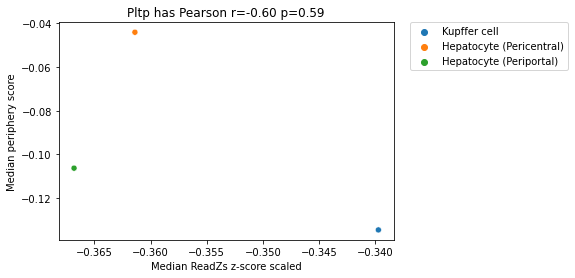

In [42]:
for gene,plot_g in m.groupby('gene'):
    
    r,p = stats.pearsonr(plot_g['median_z_scaled'], plot_g['med_score'])
    
    sns.scatterplot(
        x = 'median_z_scaled',
        y = 'med_score',
        hue = 'ontology',
        data = plot_g,
    )
    plt.title('{} has Pearson r={:.2f} p={:.2f}'.format(gene,r,p))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Median ReadZs z-score scaled')
    plt.ylabel('Median periphery score')
    plt.show()
    plt.close()